## Work
1. 請將 Epoch 加到 500 個，並觀察 learning curve 的走勢
2. 請將 Optimizer 換成 SGD，並觀察 learning curve 的走勢

In [8]:
import os
import keras
from keras import optimizers

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若有 GPU 且想開啟，可設為 "0")
os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [9]:
# 從 Keras 的內建功能中，取得 train 與 test 資料集
train, test = keras.datasets.cifar10.load_data()

In [10]:
# 將 X 與 Y 獨立放進變數
x_train, y_train = train
x_test, y_test = test
# 資料前處理 - 標準化
x_train = x_train / 255.
x_test = x_test / 255.

# 將資料從圖形 (RGB) 轉為向量 (Single Vector)
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))

# 將目標轉為 one-hot encoding
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [11]:
def build_mlp():
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input([x_train.shape[-1]])
    x = keras.layers.Dense(units=512, activation="relu")(input_layer)
    x = keras.layers.Dense(units=256, activation="relu")(x)
    x = keras.layers.Dense(units=128, activation="relu")(x)
    out = keras.layers.Dense(units=10, activation="softmax")(x)
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model
model = build_mlp()

In [12]:
"""
Compile 模型
"""
model = build_mlp()
# 用 Keras 內建方法檢視模型各層參數量
model.summary()

optimizer = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)


Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
dense_17 (Dense)             (None, 512)               1573376   
_________________________________________________________________
dense_18 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_19 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_20 (Dense)             (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


In [13]:
"""
設定要訓練的 Epoch 數
"""
model.fit(x_train, y_train, 
          epochs=500, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/500
50000/50000 [==============================] - 9s 171us/step - loss: 1.8605 - accuracy: 0.3332 - val_loss: 1.6958 - val_accuracy: 0.4017
Epoch 2/500
50000/50000 [==============================] - 6s 123us/step - loss: 1.6446 - accuracy: 0.4176 - val_loss: 1.6210 - val_accuracy: 0.4222
Epoch 3/500
50000/50000 [==============================] - 6s 123us/step - loss: 1.5528 - accuracy: 0.4515 - val_loss: 1.5430 - val_accuracy: 0.4437
Epoch 4/500
50000/50000 [==============================] - 6s 127us/step - loss: 1.4889 - accuracy: 0.4728 - val_loss: 1.5159 - val_accuracy: 0.4601
Epoch 5/500
50000/50000 [==============================] - 9s 173us/step - loss: 1.4415 - accuracy: 0.4873 - val_loss: 1.5536 - val_accuracy: 0.4523
Epoch 6/500
50000/50000 [==============================] - 8s 150us/step - loss: 1.4031 - accuracy: 0.5028 - val_loss: 1.4588 - val_accuracy: 0.4802
Epoch 7/500
50000/50000 [==============================]

50000/50000 [==============================] - 7s 136us/step - loss: 0.3386 - accuracy: 0.8801 - val_loss: 2.1136 - val_accuracy: 0.5356
Epoch 56/500
50000/50000 [==============================] - 6s 126us/step - loss: 0.3355 - accuracy: 0.8820 - val_loss: 2.2350 - val_accuracy: 0.5206
Epoch 57/500
50000/50000 [==============================] - 7s 133us/step - loss: 0.3219 - accuracy: 0.8868 - val_loss: 2.1581 - val_accuracy: 0.5293
Epoch 58/500
50000/50000 [==============================] - 6s 128us/step - loss: 0.3059 - accuracy: 0.8932 - val_loss: 2.3004 - val_accuracy: 0.5210
Epoch 59/500
50000/50000 [==============================] - 6s 119us/step - loss: 0.2954 - accuracy: 0.8966 - val_loss: 2.4617 - val_accuracy: 0.5198
Epoch 60/500
50000/50000 [==============================] - 6s 120us/step - loss: 0.2876 - accuracy: 0.9007 - val_loss: 2.5819 - val_accuracy: 0.4980
Epoch 61/500
50000/50000 [==============================] - 6s 117us/step - loss: 0.2952 - accuracy: 0.8965 - val

50000/50000 [==============================] - 6s 117us/step - loss: 0.0919 - accuracy: 0.9676 - val_loss: 3.9385 - val_accuracy: 0.5214
Epoch 110/500
50000/50000 [==============================] - 6s 115us/step - loss: 0.1120 - accuracy: 0.9607 - val_loss: 3.6957 - val_accuracy: 0.5309
Epoch 111/500
50000/50000 [==============================] - 6s 118us/step - loss: 0.0940 - accuracy: 0.9674 - val_loss: 3.8141 - val_accuracy: 0.5285
Epoch 112/500
50000/50000 [==============================] - 6s 117us/step - loss: 0.0841 - accuracy: 0.9707 - val_loss: 4.0161 - val_accuracy: 0.5294
Epoch 113/500
50000/50000 [==============================] - 7s 138us/step - loss: 0.0996 - accuracy: 0.9654 - val_loss: 3.6629 - val_accuracy: 0.5399
Epoch 114/500
50000/50000 [==============================] - 6s 121us/step - loss: 0.0853 - accuracy: 0.9697 - val_loss: 4.2315 - val_accuracy: 0.5153
Epoch 115/500
50000/50000 [==============================] - 6s 118us/step - loss: 0.1086 - accuracy: 0.9613

50000/50000 [==============================] - 6s 121us/step - loss: 0.0772 - accuracy: 0.9736 - val_loss: 4.6678 - val_accuracy: 0.5400
Epoch 164/500
50000/50000 [==============================] - 6s 120us/step - loss: 0.0688 - accuracy: 0.9763 - val_loss: 5.0622 - val_accuracy: 0.5118
Epoch 165/500
50000/50000 [==============================] - 6s 120us/step - loss: 0.0963 - accuracy: 0.9679 - val_loss: 4.6327 - val_accuracy: 0.5308
Epoch 166/500
50000/50000 [==============================] - 7s 136us/step - loss: 0.0817 - accuracy: 0.9716 - val_loss: 4.5845 - val_accuracy: 0.5222
Epoch 167/500
50000/50000 [==============================] - 6s 122us/step - loss: 0.0444 - accuracy: 0.9848 - val_loss: 4.5603 - val_accuracy: 0.5424
Epoch 168/500
50000/50000 [==============================] - 6s 118us/step - loss: 0.0426 - accuracy: 0.9859 - val_loss: 4.6766 - val_accuracy: 0.5387
Epoch 169/500
50000/50000 [==============================] - 6s 119us/step - loss: 0.0400 - accuracy: 0.9866

50000/50000 [==============================] - 6s 124us/step - loss: 1.8410e-04 - accuracy: 1.0000 - val_loss: 5.1795 - val_accuracy: 0.5577
Epoch 217/500
50000/50000 [==============================] - 6s 121us/step - loss: 1.8089e-04 - accuracy: 1.0000 - val_loss: 5.1790 - val_accuracy: 0.5583
Epoch 218/500
50000/50000 [==============================] - 6s 121us/step - loss: 1.8077e-04 - accuracy: 1.0000 - val_loss: 5.1886 - val_accuracy: 0.5572
Epoch 219/500
50000/50000 [==============================] - 6s 124us/step - loss: 1.7660e-04 - accuracy: 1.0000 - val_loss: 5.1864 - val_accuracy: 0.5568
Epoch 220/500
50000/50000 [==============================] - 6s 126us/step - loss: 1.7403e-04 - accuracy: 1.0000 - val_loss: 5.1992 - val_accuracy: 0.5570
Epoch 221/500
50000/50000 [==============================] - 6s 124us/step - loss: 1.7245e-04 - accuracy: 1.0000 - val_loss: 5.1984 - val_accuracy: 0.5561
Epoch 222/500
50000/50000 [==============================] - 6s 127us/step - loss: 1

Epoch 269/500
50000/50000 [==============================] - 7s 147us/step - loss: 1.1115e-04 - accuracy: 1.0000 - val_loss: 5.3252 - val_accuracy: 0.5562
Epoch 270/500
50000/50000 [==============================] - 6s 127us/step - loss: 1.1032e-04 - accuracy: 1.0000 - val_loss: 5.3260 - val_accuracy: 0.5565
Epoch 271/500
50000/50000 [==============================] - 6s 125us/step - loss: 1.0963e-04 - accuracy: 1.0000 - val_loss: 5.3302 - val_accuracy: 0.5569
Epoch 272/500
50000/50000 [==============================] - 7s 138us/step - loss: 1.0914e-04 - accuracy: 1.0000 - val_loss: 5.3316 - val_accuracy: 0.5565
Epoch 273/500
50000/50000 [==============================] - 7s 132us/step - loss: 1.0880e-04 - accuracy: 1.0000 - val_loss: 5.3351 - val_accuracy: 0.5568
Epoch 274/500
50000/50000 [==============================] - 6s 129us/step - loss: 1.0738e-04 - accuracy: 1.0000 - val_loss: 5.3344 - val_accuracy: 0.5573
Epoch 275/500
50000/50000 [==============================] - 6s 129us/

Epoch 322/500
50000/50000 [==============================] - 6s 119us/step - loss: 8.3275e-05 - accuracy: 1.0000 - val_loss: 5.4126 - val_accuracy: 0.5568
Epoch 323/500
50000/50000 [==============================] - 6s 118us/step - loss: 8.2698e-05 - accuracy: 1.0000 - val_loss: 5.4130 - val_accuracy: 0.5570
Epoch 324/500
50000/50000 [==============================] - 6s 116us/step - loss: 8.2326e-05 - accuracy: 1.0000 - val_loss: 5.4158 - val_accuracy: 0.5568
Epoch 325/500
50000/50000 [==============================] - 6s 117us/step - loss: 8.2253e-05 - accuracy: 1.0000 - val_loss: 5.4171 - val_accuracy: 0.5568
Epoch 326/500
50000/50000 [==============================] - 6s 119us/step - loss: 8.1497e-05 - accuracy: 1.0000 - val_loss: 5.4173 - val_accuracy: 0.5572
Epoch 327/500
50000/50000 [==============================] - 6s 117us/step - loss: 8.1398e-05 - accuracy: 1.0000 - val_loss: 5.4200 - val_accuracy: 0.5569
Epoch 328/500
50000/50000 [==============================] - 6s 120us/

Epoch 375/500
50000/50000 [==============================] - 6s 120us/step - loss: 6.7385e-05 - accuracy: 1.0000 - val_loss: 5.4790 - val_accuracy: 0.5573
Epoch 376/500
50000/50000 [==============================] - 6s 123us/step - loss: 6.7373e-05 - accuracy: 1.0000 - val_loss: 5.4801 - val_accuracy: 0.5572
Epoch 377/500
50000/50000 [==============================] - 6s 121us/step - loss: 6.7219e-05 - accuracy: 1.0000 - val_loss: 5.4805 - val_accuracy: 0.5574
Epoch 378/500
50000/50000 [==============================] - 7s 141us/step - loss: 6.6809e-05 - accuracy: 1.0000 - val_loss: 5.4824 - val_accuracy: 0.5572
Epoch 379/500
50000/50000 [==============================] - 6s 123us/step - loss: 6.6399e-05 - accuracy: 1.0000 - val_loss: 5.4841 - val_accuracy: 0.5572
Epoch 380/500
50000/50000 [==============================] - 6s 122us/step - loss: 6.6432e-05 - accuracy: 1.0000 - val_loss: 5.4847 - val_accuracy: 0.5575
Epoch 381/500
50000/50000 [==============================] - 6s 122us/

Epoch 428/500
50000/50000 [==============================] - 6s 124us/step - loss: 5.7082e-05 - accuracy: 1.0000 - val_loss: 5.5318 - val_accuracy: 0.5560
Epoch 429/500
50000/50000 [==============================] - 6s 124us/step - loss: 5.6965e-05 - accuracy: 1.0000 - val_loss: 5.5327 - val_accuracy: 0.5565
Epoch 430/500
50000/50000 [==============================] - 6s 127us/step - loss: 5.6854e-05 - accuracy: 1.0000 - val_loss: 5.5338 - val_accuracy: 0.5564
Epoch 431/500
50000/50000 [==============================] - 6s 122us/step - loss: 5.6601e-05 - accuracy: 1.0000 - val_loss: 5.5350 - val_accuracy: 0.5557
Epoch 432/500
50000/50000 [==============================] - 6s 122us/step - loss: 5.6446e-05 - accuracy: 1.0000 - val_loss: 5.5356 - val_accuracy: 0.5559
Epoch 433/500
50000/50000 [==============================] - 8s 154us/step - loss: 5.6272e-05 - accuracy: 1.0000 - val_loss: 5.5370 - val_accuracy: 0.5555
Epoch 434/500
50000/50000 [==============================] - 7s 141us/

Epoch 481/500
50000/50000 [==============================] - 6s 124us/step - loss: 4.9735e-05 - accuracy: 1.0000 - val_loss: 5.5765 - val_accuracy: 0.5559
Epoch 482/500
50000/50000 [==============================] - 7s 141us/step - loss: 4.9658e-05 - accuracy: 1.0000 - val_loss: 5.5768 - val_accuracy: 0.5560
Epoch 483/500
50000/50000 [==============================] - 6s 128us/step - loss: 4.9467e-05 - accuracy: 1.0000 - val_loss: 5.5773 - val_accuracy: 0.5556
Epoch 484/500
50000/50000 [==============================] - 6s 128us/step - loss: 4.9351e-05 - accuracy: 1.0000 - val_loss: 5.5787 - val_accuracy: 0.5561
Epoch 485/500
50000/50000 [==============================] - 6s 124us/step - loss: 4.9306e-05 - accuracy: 1.0000 - val_loss: 5.5793 - val_accuracy: 0.5560
Epoch 486/500
50000/50000 [==============================] - 6s 123us/step - loss: 4.9157e-05 - accuracy: 1.0000 - val_loss: 5.5801 - val_accuracy: 0.5558
Epoch 487/500
50000/50000 [==============================] - 6s 125us/

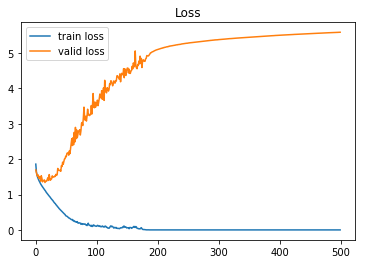

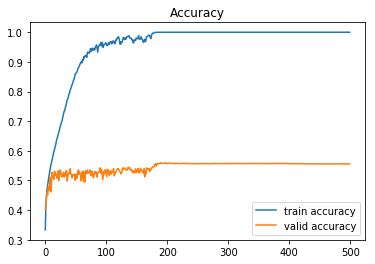

In [16]:
import matplotlib.pyplot as plt
# 以視覺畫方式檢視訓練過程

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["accuracy"]
valid_acc = model.history.history["val_accuracy"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()